In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mlp
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [102]:
gl=pd.read_csv("googleplaystore.csv")

In [103]:
re=pd.read_csv("googleplaystore_user_reviews.csv")

In [105]:
re.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
App                       64295 non-null object
Translated_Review         37427 non-null object
Sentiment                 37432 non-null object
Sentiment_Polarity        37432 non-null float64
Sentiment_Subjectivity    37432 non-null float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [106]:
re.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [107]:
gl.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [108]:
gl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [109]:
cols = ['Reviews', 'Size', 'Price']
gl[cols] = gl[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [110]:
gl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10840 non-null float64
Size              0 non-null float64
Installs          10841 non-null object
Type              10840 non-null object
Price             10040 non-null float64
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(4), object(9)
memory usage: 1.1+ MB


In [111]:
# Groupby by country
category= gl.groupby("Category")
care=re.groupby("App")

In [112]:
# Drop all rows with missing values
clre=re.dropna()

In [113]:
clre.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [114]:
# Start with one review
text=clre.Translated_Review[0]

In [115]:
wordcloud=WordCloud().generate(text)

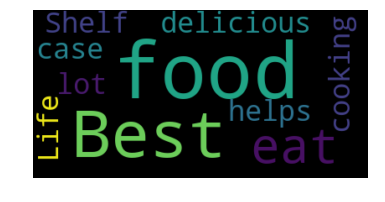

In [116]:
# Display the image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

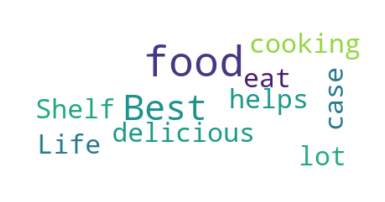

In [117]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [118]:
text = " ".join(review for review in clre.Translated_Review)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 4274608 words in the combination of all review.


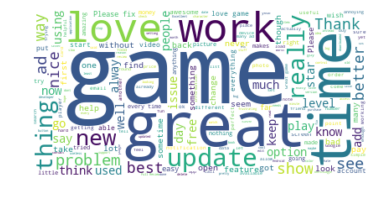

In [119]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["app","good", "phone","make","still", "give", "even", "need","want"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [120]:
category.describe()

Price                                     Rating  \
                      count mean  std  min  25%  50%  75%  max   count   
Category                                                                 
1.9                     0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN     1.0   
ART_AND_DESIGN         62.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    62.0   
AUTO_AND_VEHICLES      82.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    73.0   
BEAUTY                 53.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    42.0   
BOOKS_AND_REFERENCE   203.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   178.0   
BUSINESS              446.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   303.0   
COMICS                 60.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    58.0   
COMMUNICATION         360.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   328.0   
DATING                227.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   195.0   
EDUCATION             152.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   155.0   
ENTERTAINMENT         147.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   149.0   
EVENTS                 63.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    45.0   
FAMILY               1781.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1747.0   
FINANCE               349.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   323.0   
FOOD_AND_DRINK        125.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   109.0   
GAME                 1061.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1097.0   
HEALTH_AND_FITNESS    325.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   297.0   
HOUSE_AND_HOME         88.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    76.0   
LIBRARIES_AND_DEMO     84.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    65.0   
LIFESTYLE             363.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   314.0   
MAPS_AND_NAVIGATION   132.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   124.0   
MEDICAL               354.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   350.0   
NEWS_AND_MAGAZINES    281.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   233.0   
PARENTING              58.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    50.0   
PERSONALIZATION       309.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   314.0   
PHOTOGRAPHY           313.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   317.0   
PRODUCTIVITY          396.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   351.0   
SHOPPING              258.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   238.0   
SOCIAL                292.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   259.0   
SPORTS                360.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   319.0   
TOOLS                 765.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   734.0   
TRAVEL_AND_LOCAL      246.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   226.0   
VIDEO_PLAYERS         171.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   160.0   
WEATHER                74.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    75.0   

                               ...    Reviews              Size               \
                          mean ...        75%         max count mean std min   
Category                       ...                                             
1.9                  19.000000 ...        NaN         NaN   0.0  NaN NaN NaN   
ART_AND_DESIGN        4.358065 ...    5754.00    295237.0   0.0  NaN NaN NaN   
AUTO_AND_VEHICLES     4.190411 ...    4140.00    271920.0   0.0  NaN NaN NaN   
BEAUTY                4.278571 ...    3595.00    113715.0   0.0  NaN NaN NaN   
BOOKS_AND_REFERENCE   4.346067 ...   19085.00   2915189.0   0.0  NaN NaN NaN   
BUSINESS              4.121452 ...    3810.75   1279800.0   0.0  NaN NaN NaN   
COMICS                4.155172 ...   19748.25   1013944.0   0.0  NaN NaN NaN   
COMMUNICATION         4.158537 ...  447478.50  69119316.0   0.0  NaN NaN NaN   
DATING                3.970769 ...   11762.75    516917.0   0.0  NaN NaN NaN   
EDUCATION             4.389032 ...  144111.25   6290507.0   0.0  NaN NaN NaN   
ENTERTAINMENT         4.126174 ...  288150.00   7165362.0   0.0  NaN NaN NaN   
EVENTS                4.435556 ...     874.50     40113.0   0.0  NaN NaN NaN   
FAMILY                4.192272 ...   26455.75  44881447.0   0.0  NaN NaN NaN   
FIN

In [121]:
com=gl.loc[gl['Category'] == "COMMUNICATION"]
com.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847.0,NaN,"1,000,000,000+",Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,NaN,"1,000,000,000+",Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
337,Messenger for SMS,COMMUNICATION,4.3,125257.0,NaN,"10,000,000+",Free,0.0,Teen,Communication,"June 6, 2018",1.8.9,4.1 and up
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995.0,NaN,"1,000,000,000+",Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
339,Messenger Lite: Free Calls & Messages,COMMUNICATION,4.4,1429035.0,NaN,"100,000,000+",Free,0.0,Everyone,Communication,"July 25, 2018",37.0.0.7.163,2.3 and up


In [122]:
com.to_csv('com.csv')

In [123]:
game=gl.loc[gl['Category'] == "GAME"]
game.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388.0,NaN,"100,000,000+",Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1654,Subway Surfers,GAME,4.5,27722264.0,NaN,"1,000,000,000+",Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1655,Candy Crush Saga,GAME,4.4,22426677.0,NaN,"500,000,000+",Free,0.0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1656,Solitaire,GAME,4.7,254258.0,NaN,"10,000,000+",Free,0.0,Everyone,Card,"August 1, 2018",2.137.0,4.1 and up
1657,Bubble Shooter,GAME,4.5,148897.0,NaN,"10,000,000+",Free,0.0,Everyone,Casual,"July 17, 2018",1.20.1,4.0.3 and up


In [124]:
game.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1144 entries, 1653 to 10804
Data columns (total 13 columns):
App               1144 non-null object
Category          1144 non-null object
Rating            1097 non-null float64
Reviews           1144 non-null float64
Size              0 non-null float64
Installs          1144 non-null object
Type              1144 non-null object
Price             1061 non-null float64
Content Rating    1144 non-null object
Genres            1144 non-null object
Last Updated      1144 non-null object
Current Ver       1144 non-null object
Android Ver       1144 non-null object
dtypes: float64(4), object(9)
memory usage: 125.1+ KB


In [125]:
game.to_csv('game.csv')

In [126]:
top2=game.append(com)
top2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388.0,NaN,"100,000,000+",Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1654,Subway Surfers,GAME,4.5,27722264.0,NaN,"1,000,000,000+",Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1655,Candy Crush Saga,GAME,4.4,22426677.0,NaN,"500,000,000+",Free,0.0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1656,Solitaire,GAME,4.7,254258.0,NaN,"10,000,000+",Free,0.0,Everyone,Card,"August 1, 2018",2.137.0,4.1 and up
1657,Bubble Shooter,GAME,4.5,148897.0,NaN,"10,000,000+",Free,0.0,Everyone,Casual,"July 17, 2018",1.20.1,4.0.3 and up


In [127]:
top2.to_csv('top2.csv')

In [128]:
ap=pd.read_csv("AppleStore.csv")

In [129]:
ap.dropna()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1
5,6,283619399,Shanghai Mahjong,10485713,USD,0.99,8253,5516,4.0,4.0,1.8,4+,Games,47,5,1,1
6,7,283646709,PayPal - Send and request money safely,227795968,USD,0.00,119487,879,4.0,4.5,6.12.0,4+,Finance,37,0,19,1
7,8,284035177,Pandora - Music & Radio,130242560,USD,0.00,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1
8,9,284666222,PCalc - The Best Calculator,49250304,USD,9.99,1117,4,4.5,5.0,3.6.6,4+,Utilities,37,5,1,1
9,10,284736660,Ms. PAC-MAN,70023168,USD,3.99,7885,40,4.0,4.0,4.0.4,4+,Games,38,0,10,1


In [130]:
apgame=ap.loc[ap['prime_genre'] == "Games"]

In [131]:
apcom=ap.loc[ap['prime_genre']=='Social']

In [132]:
aptop2=apgame.append(apcom)

In [133]:
aptop2.to_csv('aptop2.csv')

In [16]:
top_cat=gl.groupby('Category').size().reset_index(name='Count').nlargest(6,'Count')
display(top_cat)

,Category,Count
12,FAMILY,1972
15,GAME,1144
30,TOOLS,843
21,MEDICAL,463
5,BUSINESS,460
26,PRODUCTIVITY,424


In [11]:
gl['Reviews'].max()

'9992'

In [10]:
intdata=blk.drop(columns=['User_ID','Gender','Age','Product_ID','City_Category','Stay_In_Current_City_Years'])
intdata

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [5]:
Installs = np.unique(gl['Installs']) # Age segmentation
Installs

array(['0', '0+', '1+', '1,000+', '1,000,000+', '1,000,000,000+', '10+',
       '10,000+', '10,000,000+', '100+', '100,000+', '100,000,000+', '5+',
       '5,000+', '5,000,000+', '50+', '50,000+', '50,000,000+', '500+',
       '500,000+', '500,000,000+', 'Free'], dtype=object)

In [13]:
price=np.unique(gl['Price'])
price

array(['$0.99', '$1.00', '$1.04', '$1.20', '$1.26', '$1.29', '$1.49',
       '$1.50', '$1.59', '$1.61', '$1.70', '$1.75', '$1.76', '$1.96',
       '$1.97', '$1.99', '$10.00', '$10.99', '$109.99', '$11.99',
       '$12.99', '$13.99', '$14.00', '$14.99', '$15.46', '$15.99',
       '$154.99', '$16.99', '$17.99', '$18.99', '$19.40', '$19.90',
       '$19.99', '$2.00', '$2.49', '$2.50', '$2.56', '$2.59', '$2.60',
       '$2.90', '$2.95', '$2.99', '$200.00', '$24.99', '$25.99', '$28.99',
       '$29.99', '$299.99', '$3.02', '$3.04', '$3.08', '$3.28', '$3.49',
       '$3.61', '$3.88', '$3.90', '$3.95', '$3.99', '$30.99', '$33.99',
       '$37.99', '$379.99', '$389.99', '$39.99', '$394.99', '$399.99',
       '$4.29', '$4.49', '$4.59', '$4.60', '$4.77', '$4.80', '$4.84',
       '$4.85', '$4.99', '$400.00', '$46.99', '$5.00', '$5.49', '$5.99',
       '$6.49', '$6.99', '$7.49', '$7.99', '$74.99', '$79.99', '$8.49',
       '$8.99', '$89.99', '$9.00', '$9.99', '0', 'Everyone'], dtype=object)

In [15]:
free=gl.loc[gl['Price'] == 0]
free

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


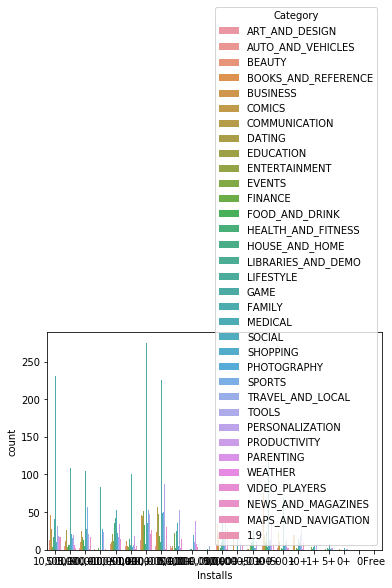

In [7]:
sns.countplot(gl['Installs'],hue=gl['Category'])

In [12]:
gl.groupby('Installs')['Category'].count()

Installs
0                    1
0+                  14
1+                  67
1,000+             907
1,000,000+        1579
1,000,000,000+      58
10+                386
10,000+           1054
10,000,000+       1252
100+               719
100,000+          1169
100,000,000+       409
5+                  82
5,000+             477
5,000,000+         752
50+                205
50,000+            479
50,000,000+        289
500+               330
500,000+           539
500,000,000+        72
Free                 1
Name: Category, dtype: int64